# **Jobsheet 3: Regression**

# **Lab Work 1**

In [16]:
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv('/dataset.csv')

In [18]:
# inspect first data
data.head()

# check data size
data.shape

# check general information
data.info()

# check data deskription
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


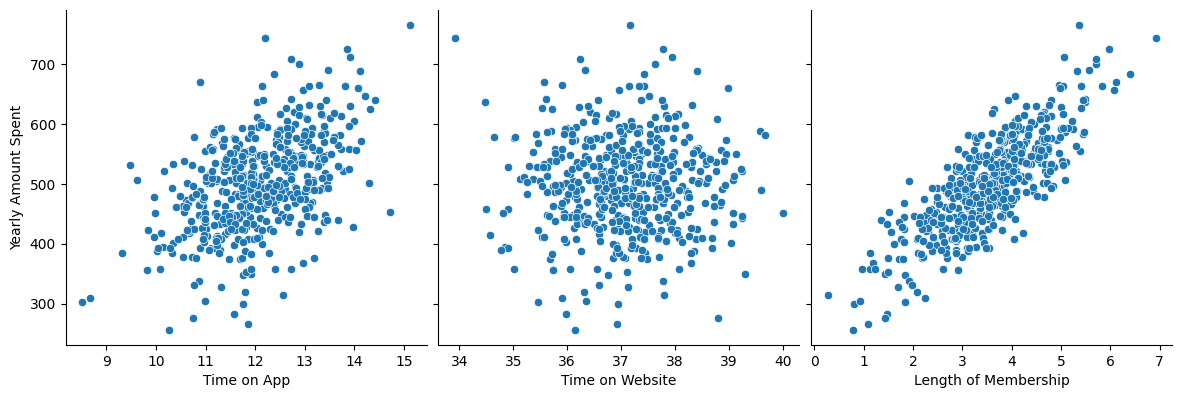

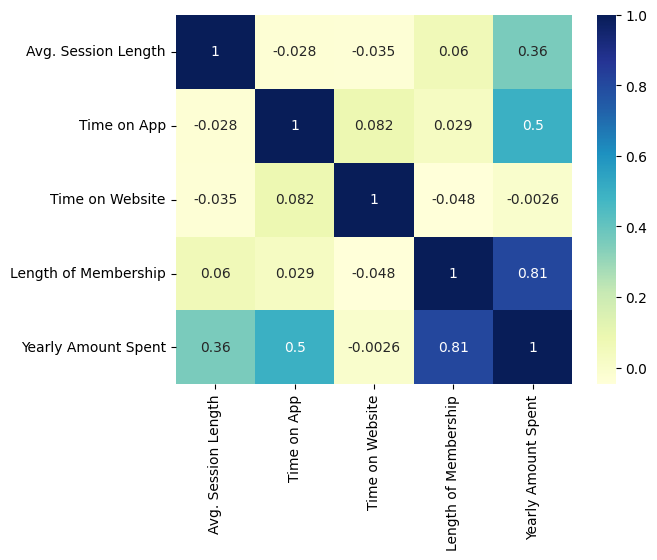

In [19]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# Filter only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Now generate the heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

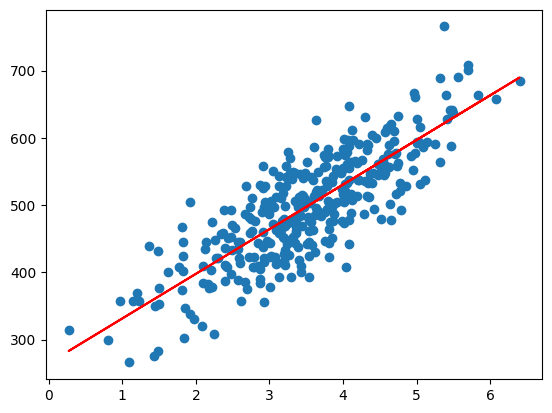

In [20]:
from re import X
# X is independen variable, Y is dependen variable
X = data['Length of Membership']
y = data['Yearly Amount Spent']

# Split training and testing data using 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Build regression model
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualize model
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015 * X_train, 'r')
plt.show()

<ipython-input-21-06ee1a61a8d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


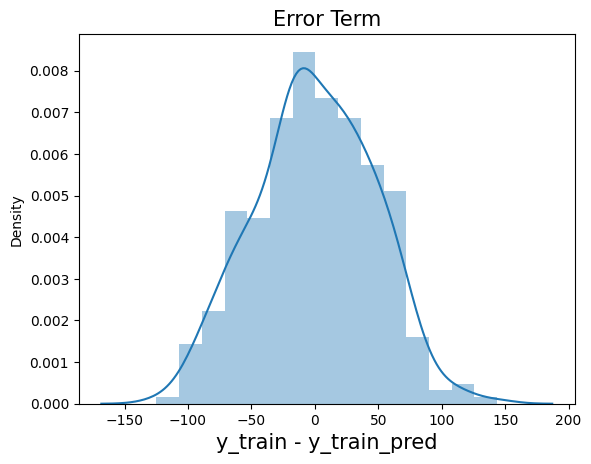

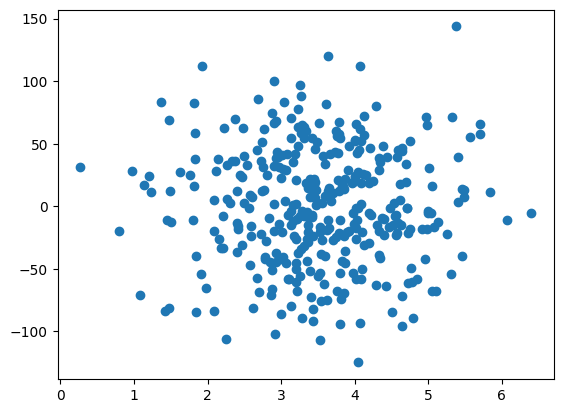

In [21]:
# Residual Analysis
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Term', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [22]:
# Make prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Evaluate using R^2
from sklearn.metrics import r2_score
r2_squared = r2_score(y_test, y_test_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

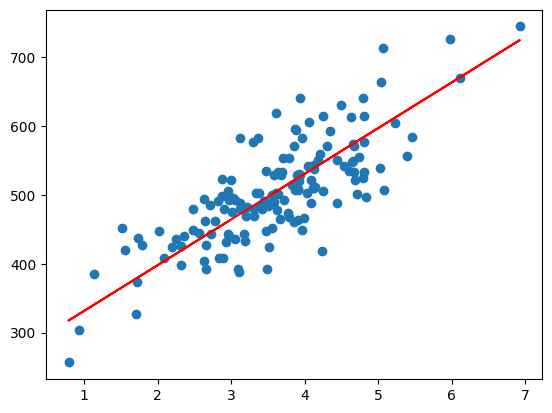

In [23]:
# Visualize the result
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show

## **Lab Work 2: Support Vector Regression**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Load data
dataset = pd.read_csv('/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [29]:
# Preprocessing --> Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [30]:
# Fit SVR Model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-31-dcabbd12cef9>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) # Use np.arange instead of np.arrage


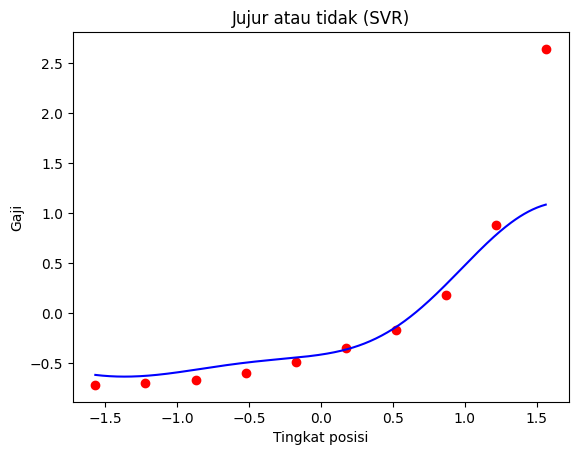

In [31]:
# Visualize
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1) # Use np.arange instead of np.arrage
plt.scatter(X, y, color='red') # Change Y to y
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [32]:
# Make a prediction
# Create 2D array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scale predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [33]:
# Print result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [34]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MSE
mse = mean_squared_error(y_actual, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


## **Assignment**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('/insurance.csv')

encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_features = encoder.fit_transform(data[['sex', 'smoker', 'region']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))
data = pd.concat([data.drop(['sex', 'smoker', 'region'], axis=1), encoded_df], axis=1)

# Display the first few rows of the dataset
data.head()

# Display data size
data.shape

# Display general information
data.info()

# Display data description
data.describe()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


### **Identify features and target variable**

In [54]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  # Independent variables
target = 'charges'  # Target variable (personal medical costs)


### **Split the data into training and testing sets**

In [48]:
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']  # Independent variables - Updated to include the new encoded column names
target = 'charges'  # Target variable (personal medical costs)

X = data[features]
y = data[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Feature Scaling**

In [49]:
print(X_train.info())

# Select numerical features for scaling
numerical_features = ['age', 'bmi', 'children']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   sex_male          1070 non-null   float64
 4   smoker_yes        1070 non-null   float64
 5   region_northwest  1070 non-null   float64
 6   region_southeast  1070 non-null   float64
 7   region_southwest  1070 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 75.2 KB
None


### **Create a multiple linear regression model using Scikit-Learn.**

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Train the model on the training data and make predictions on the testing data.**

In [51]:
y_pred = model.predict(X_test)


### **Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.**

In [52]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.85136148
Mean Absolute Error (MAE): 4181.194473753652


### **Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


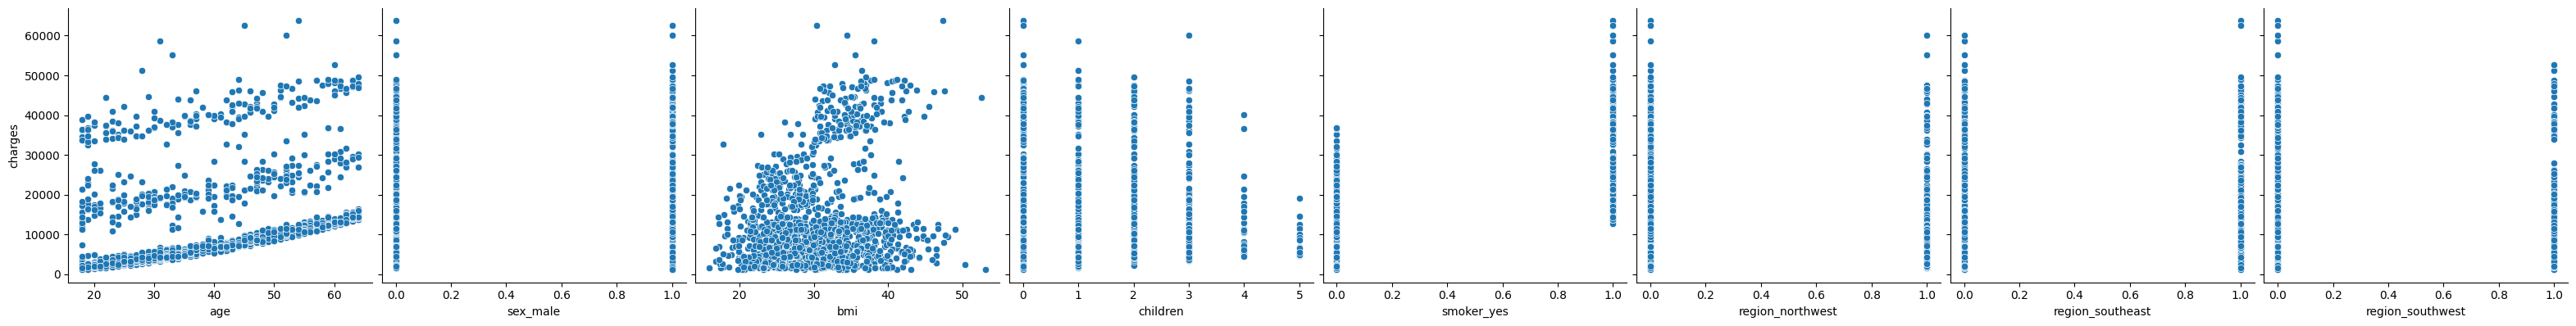

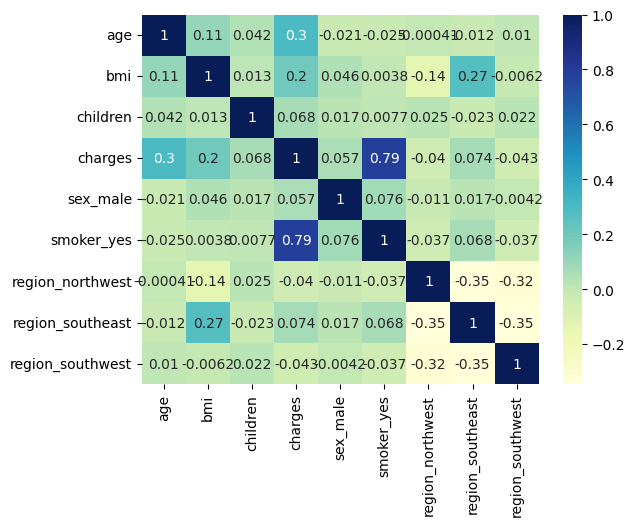

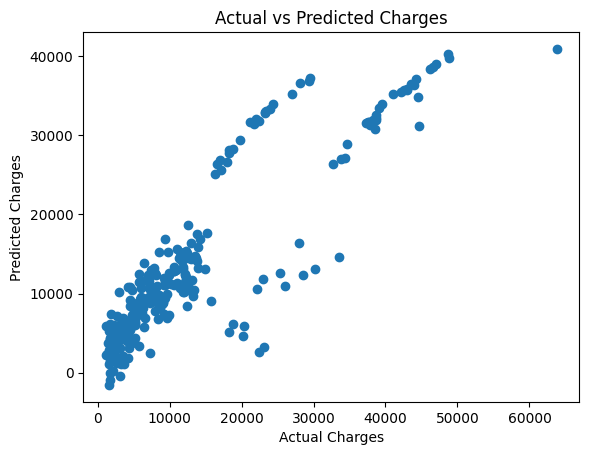

In [55]:
# visualize the data using pairplot
sns.pairplot(data, x_vars=['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Visualize Actual data and predict charges
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()
